In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [11]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression(C=1, random_state=42, max_iter=10000)
log_reg_1.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=42)

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [12]:
from sklearn.linear_model import LogisticRegression

log_reg_100 = LogisticRegression(C=100, random_state=42, max_iter=10000)
log_reg_100.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000, random_state=42)

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [13]:
from sklearn.linear_model import LogisticRegression

log_reg_01 = LogisticRegression(C=0.01, random_state=42, max_iter=10000)
log_reg_01.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

In [16]:
coefficients_1 = log_reg_1.coef_



coefficients_1

array([[ 8.98185930e-02,  6.04470430e-01,  1.61582383e-01,
         2.44778313e-01, -9.12549613e-04, -4.99309400e-01,
        -1.90085568e+00, -3.16616672e-02, -6.97752157e-01,
         1.05886563e+00, -3.90077261e-01, -9.02707082e-01,
         1.03525843e-04]])

In [17]:
coefficients_100 = log_reg_100.coef_
coefficients_100

array([[-1.24140913,  1.53490703,  1.90195016,  0.44101694, -0.02153953,
        -0.84443983, -6.73322142, -1.20898663, -2.65997175,  3.02449041,
        -1.97782998, -2.69506134,  0.00952734]])

In [18]:
coefficients_01 = log_reg_01.coef_
coefficients_01

array([[ 0.04152741,  0.15362316,  0.00967803,  0.13179754, -0.00511373,
        -0.09692411, -0.21376255,  0.01164047, -0.08398573,  0.3269878 ,
        -0.04351013, -0.15379535, -0.00205486]])

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

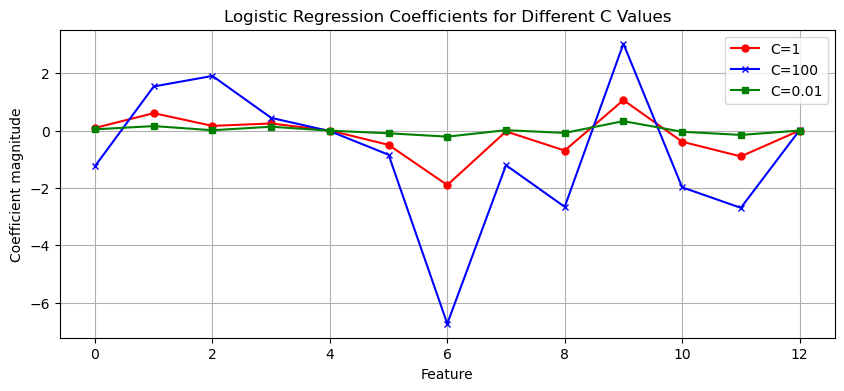

In [21]:
coefficients_1 = log_reg_1.coef_[0]
coefficients_100 = log_reg_100.coef_[0]
coefficients_01 = log_reg_01.coef_[0]


coefficient_indices = range(len(coefficients_1))


plt.figure(figsize=(10, 4))
plt.plot(
    coefficient_indices, coefficients_1, "r-", marker="o", markersize=5, label="C=1"
)
plt.plot(
    coefficient_indices, coefficients_100, "b-", marker="x", markersize=5, label="C=100"
)
plt.plot(
    coefficient_indices, coefficients_01, "g-", marker="s", markersize=5, label="C=0.01"
)
# plt.xticks(ticks=coefficient_indices, labels=["Petal length", "Petal width"])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.title("Logistic Regression Coefficients for Different C Values")
plt.legend(loc="best")
plt.grid(True)
plt.show()